In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import nltk
import re
import os
from sklearn import feature_extraction
import string

# Read in and Clean Data 

In [2]:
texts = []
tweets = []
with open('./twitter/data/stream_apple.json', 'r') as fh:
    for line in fh:
        tweet = json.loads(line)
        tweets.append(tweet)
        texts.append(tweet['text'])
        

In [3]:
len(texts)

710

Remove links from tweets as well as punctuation

In [4]:
# transTable = str.maketrans({key: None for key in string.punctuation})
# texts = list(map(lambda tweet: re.sub(r'http\S+', '', tweet).translate(transTable), texts))

Remove links from tweets

In [5]:
texts = list(map(lambda tweet: re.sub(r'http\S+', '', tweet), texts))

Remove Stopwords

In [6]:
# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')

Stemmer

In [7]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [24]:
# here I define a tokenizer and stemmer which returns the set of
# stems in the text that it is passed. Also remove stopwords

def tokenize(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            # Remove stopwords
            if not token in stopwords:
                filtered_tokens.append(token)
    return filtered_tokens

def tokenize_and_stem(text):
    tokenized = tokenize(text)
    stems = [stemmer.stem(t) for t in tokenized]
    return stems


def tokenize_only(text):
    return tokenize(text)

Create a stemmed and tokenized and just tokenized vocabs

In [25]:
totalvocab_stemmed = []
totalvocab_tokenized = []

for i in texts:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

Put into a dataframe

In [26]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 6958 items in vocab_frame


Convert into a TF-IDF matrix

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
# tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=200000,
#                                  min_df=0.03, stop_words='english',
#                                  use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_vectorizer = TfidfVectorizer(max_df=.8, min_df=.01,
                                   stop_words='english', 
                                   use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1, 3))


%time tfidf_matrix = tfidf_vectorizer.fit_transform(texts) #fit the vectorizer to synopses

print(tfidf_matrix.shape)
terms = tfidf_vectorizer.get_feature_names()
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

CPU times: user 301 ms, sys: 0 ns, total: 301 ms
Wall time: 339 ms
(710, 249)


In [30]:
terms

["'m",
 "'m flex",
 "'m flex mathew",
 "'s",
 "'s alli",
 "'s alli brook",
 "'s comput",
 "'s mic",
 "'s mic drop",
 '512gb',
 '512gb iphon',
 'ad',
 'album',
 'alli',
 'alli brook',
 'alli brook topic',
 'allybrook',
 'allybrook topicmusictv',
 'allybrook topicmusictv avail',
 'amp',
 'amp appl',
 'aoki',
 'aoki remix',
 'aoki remix ▪️itun',
 'app',
 'appl',
 "appl 's",
 'appl music',
 'appl music appl',
 'appl music dope',
 'appl music free',
 'appl watch',
 'ask',
 'attempt',
 'attempt obstruct',
 'attempt obstruct justic',
 'avail',
 'avail itun',
 'bitcoin',
 'boundari',
 'brasil',
 'break',
 'break new',
 'break new boundari',
 'brook',
 'brook topic',
 'brook topic final',
 'bts_billboard',
 'bts_billboard buy',
 'bts_billboard buy bts_twt',
 'bts_twt',
 "bts_twt 's",
 "bts_twt 's mic",
 'buy',
 'buy bts_twt',
 "buy bts_twt 's",
 'buyperfectonitun',
 'carnav',
 'check',
 'claudialeitt',
 'commerci',
 'comput',
 'da',
 'day',
 'desiign',
 'desiign steve',
 'desiign steve aoki',
 

# K-means clustering

In [31]:
from sklearn.cluster import KMeans

## Find number of clusters 

In [32]:
# Find number of clusters
range_n_clusters = range(2, 25)

### Elbow Plot

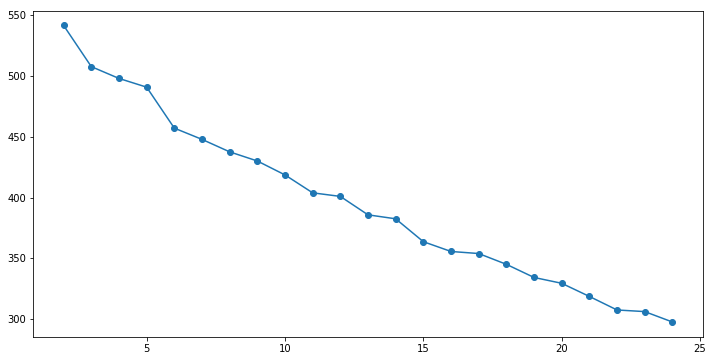

In [33]:
cluster_errors = []

for num_clusters in range_n_clusters:
    clusters = KMeans( num_clusters )
    clusters.fit( tfidf_matrix )
    cluster_errors.append( clusters.inertia_)
    
cluster_err_df = clusters_df = pd.DataFrame({"num_clusters":range_n_clusters, "cluster_errors": cluster_errors})

plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o")

### Silhoutte Score

For n_clusters = 2 The average silhouette_score is : 0.0767498067654


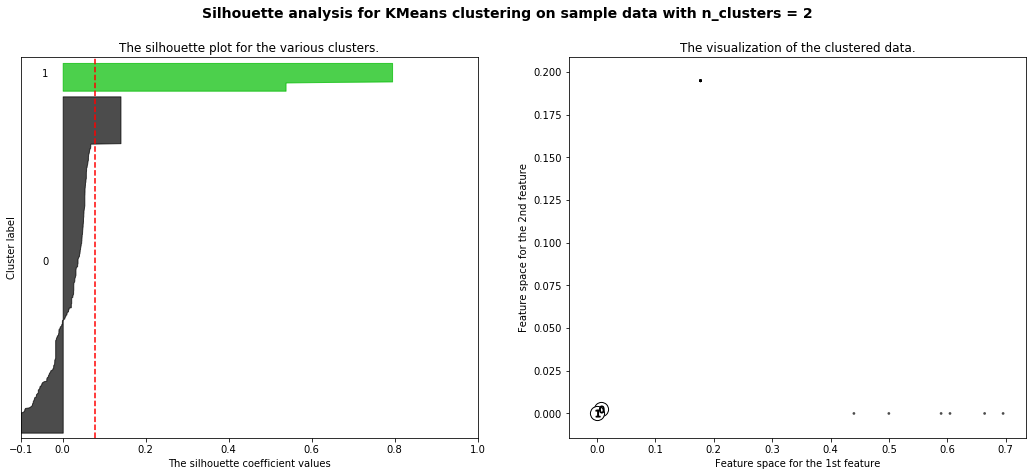

For n_clusters = 3 The average silhouette_score is : 0.0950093036811


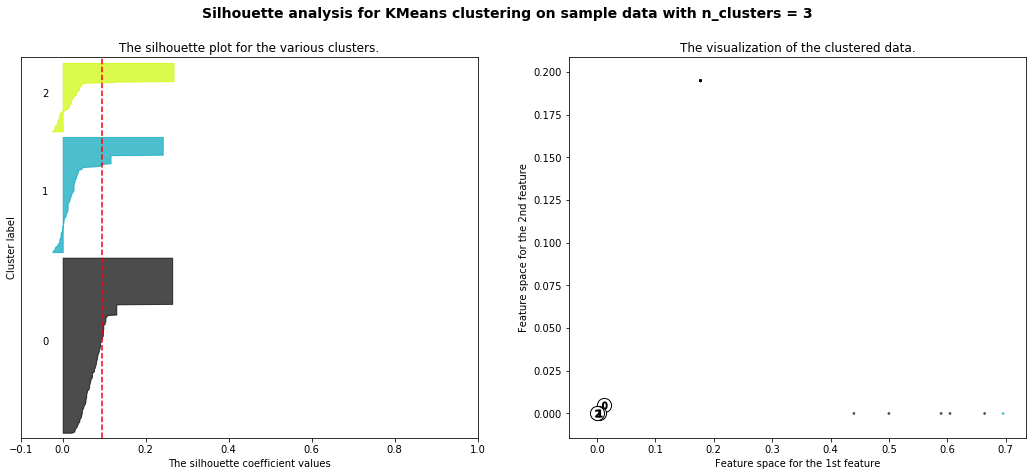

For n_clusters = 4 The average silhouette_score is : 0.118075898981


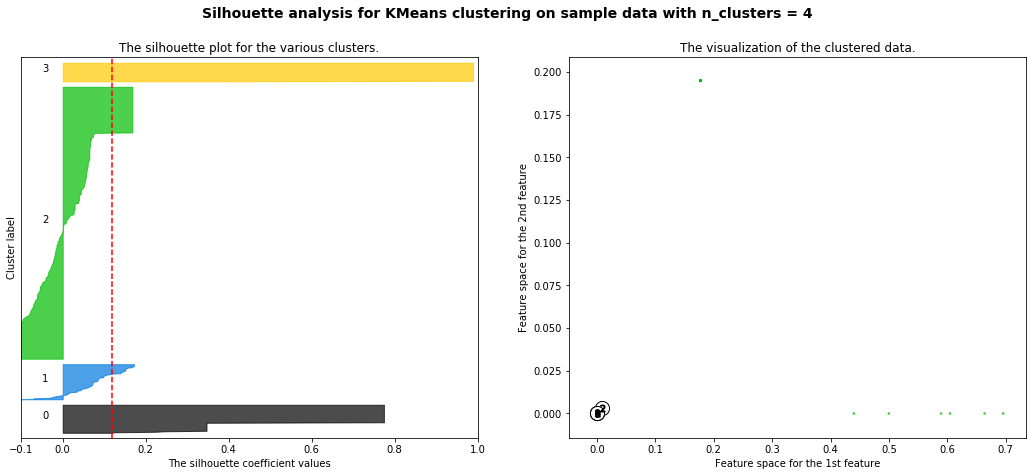

For n_clusters = 5 The average silhouette_score is : 0.131646916267


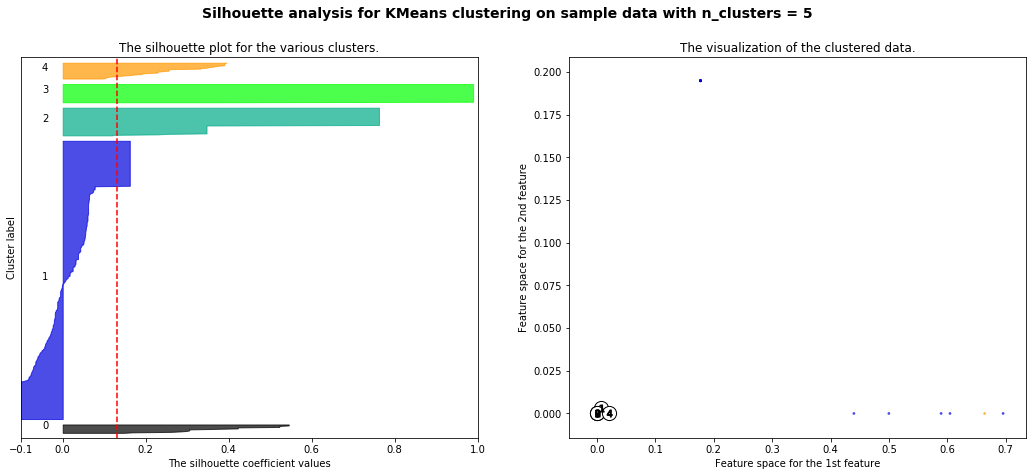

For n_clusters = 6 The average silhouette_score is : 0.152366729356


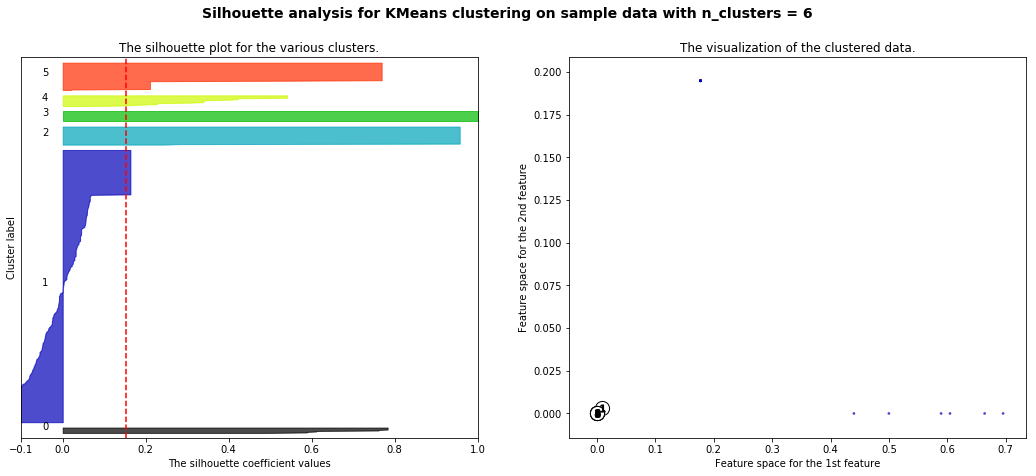

For n_clusters = 7 The average silhouette_score is : 0.167814192956


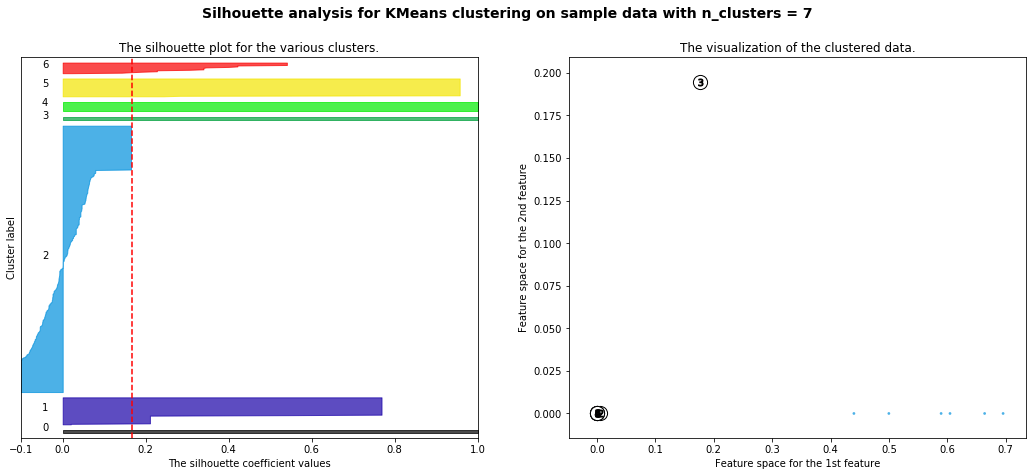

For n_clusters = 8 The average silhouette_score is : 0.180130899468


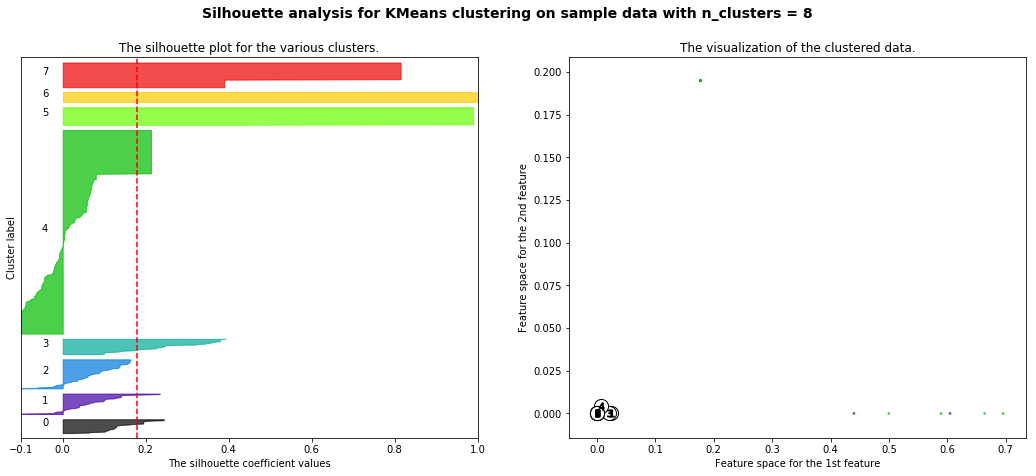

For n_clusters = 9 The average silhouette_score is : 0.195300758934


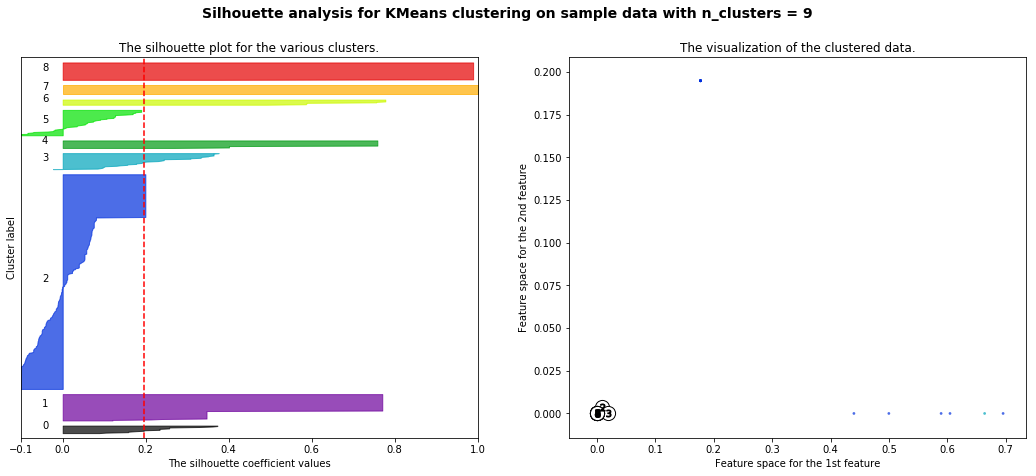

For n_clusters = 10 The average silhouette_score is : 0.211910822176


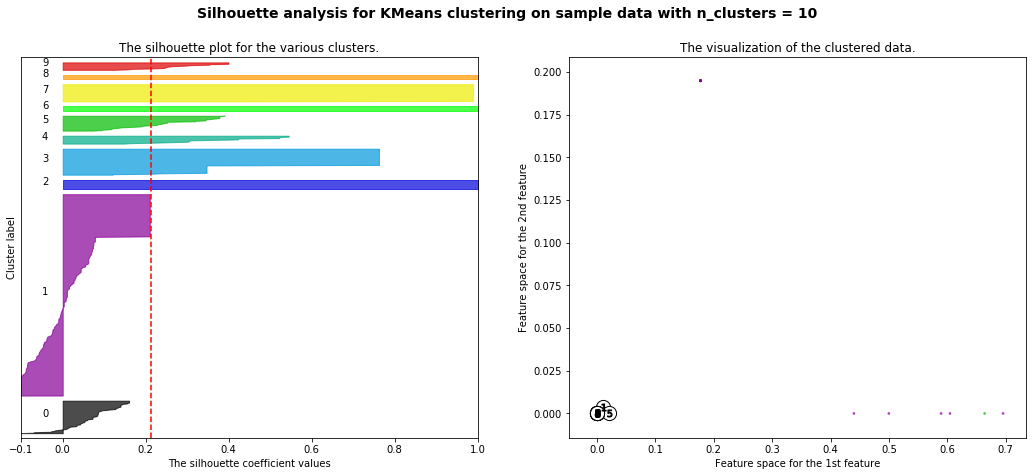

For n_clusters = 11 The average silhouette_score is : 0.219877629581


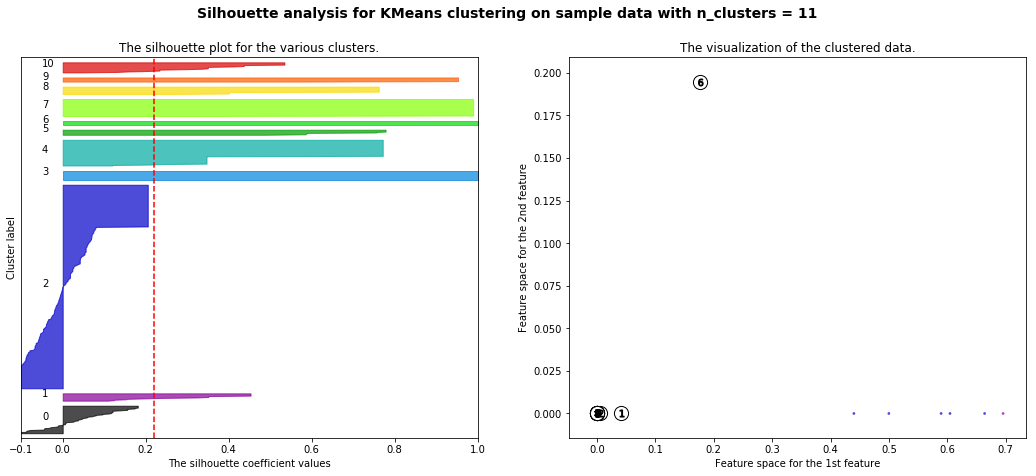

For n_clusters = 12 The average silhouette_score is : 0.235395255412


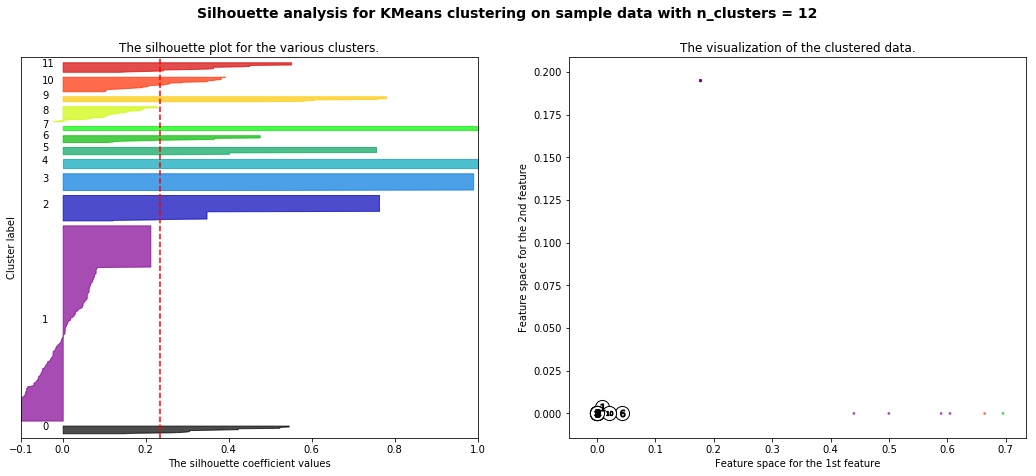

For n_clusters = 13 The average silhouette_score is : 0.238006138521


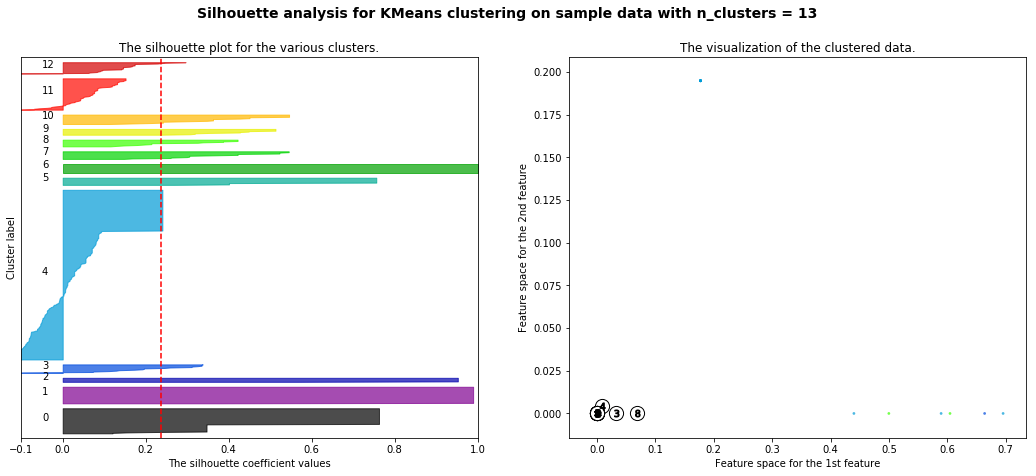

For n_clusters = 14 The average silhouette_score is : 0.25327870764


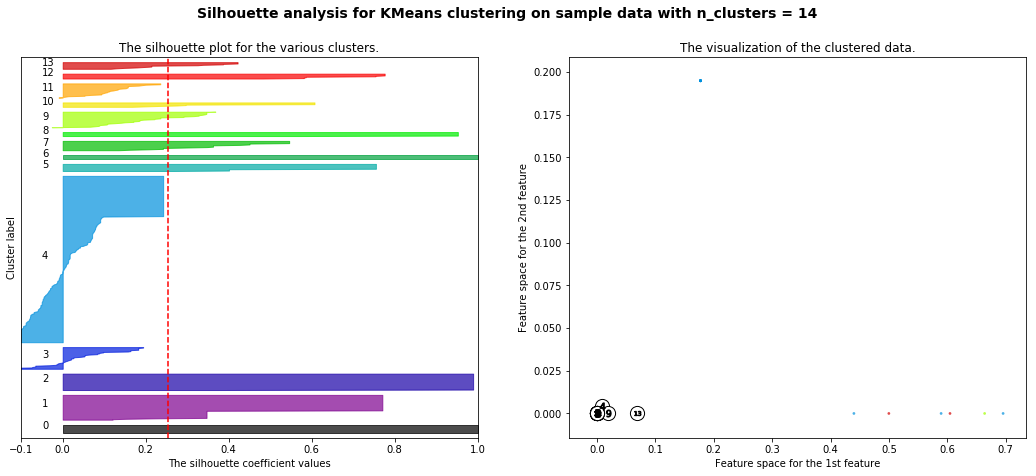

For n_clusters = 15 The average silhouette_score is : 0.251363785784


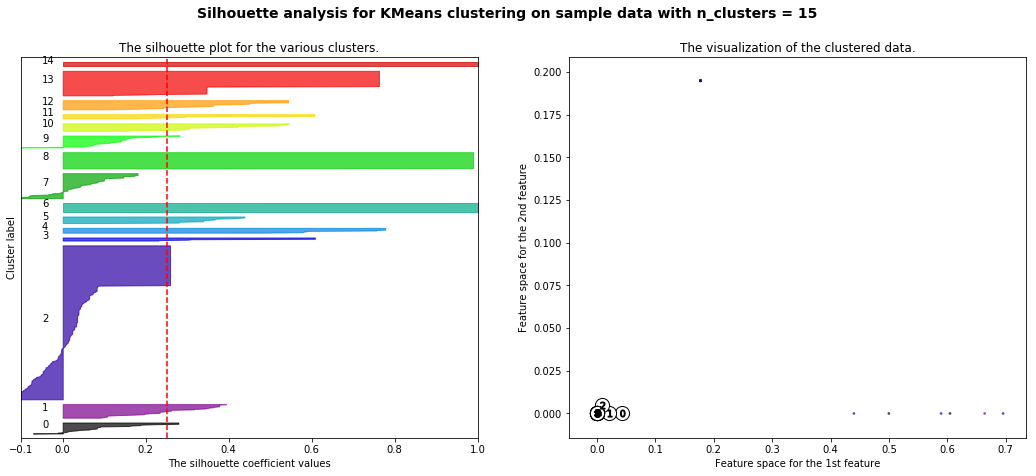

For n_clusters = 16 The average silhouette_score is : 0.272470671923


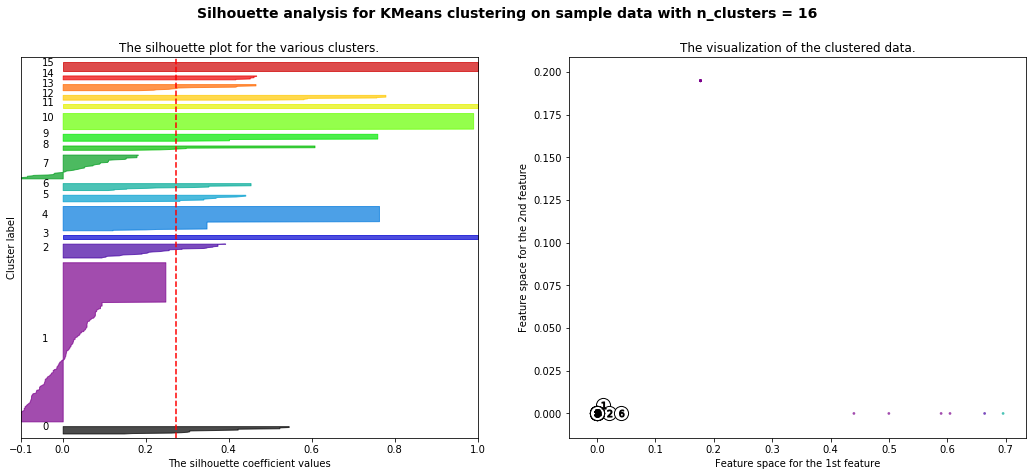

For n_clusters = 17 The average silhouette_score is : 0.283781797249


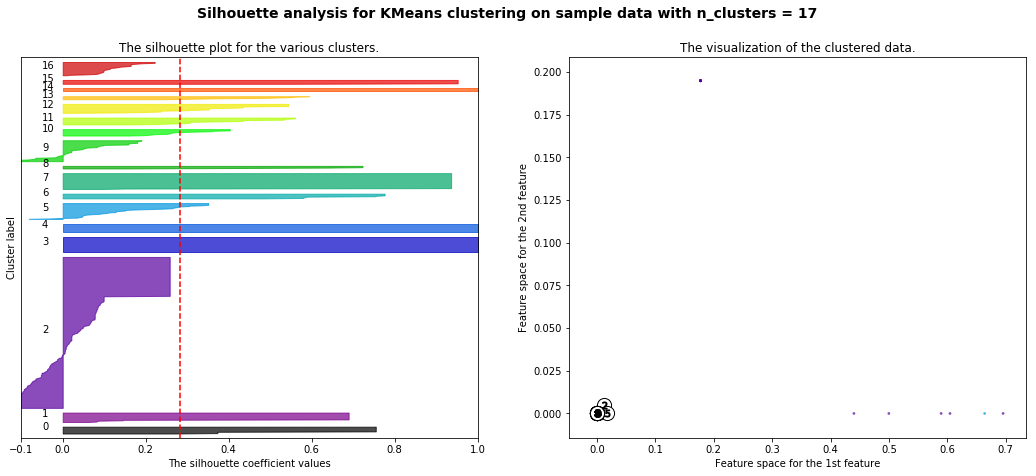

For n_clusters = 18 The average silhouette_score is : 0.285508944414


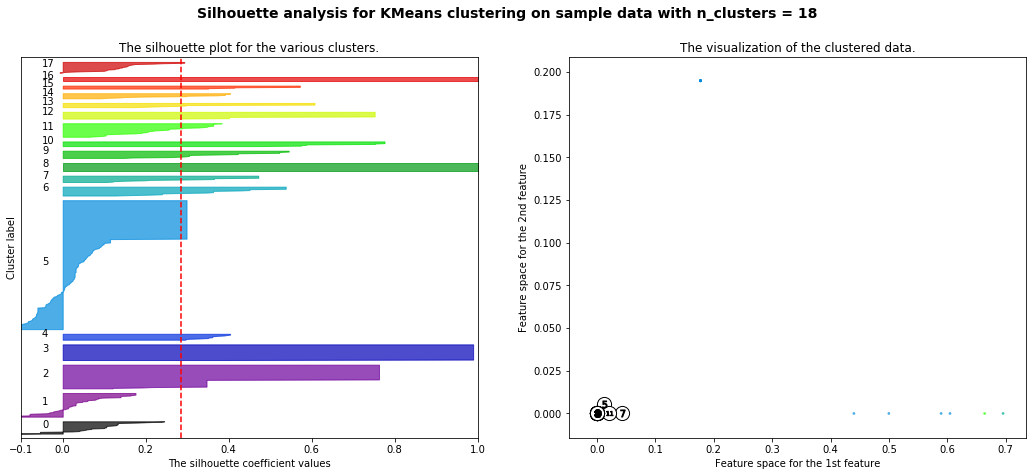

For n_clusters = 19 The average silhouette_score is : 0.282510643646


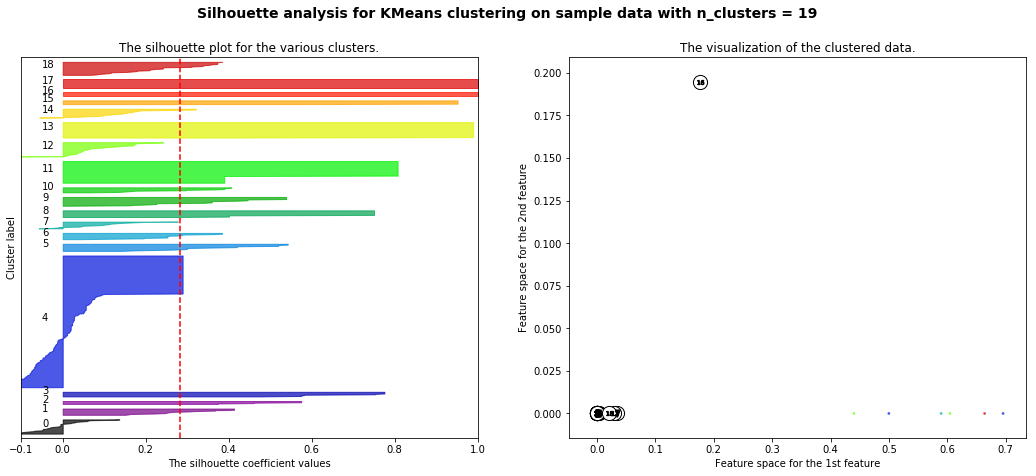

For n_clusters = 20 The average silhouette_score is : 0.321403048423


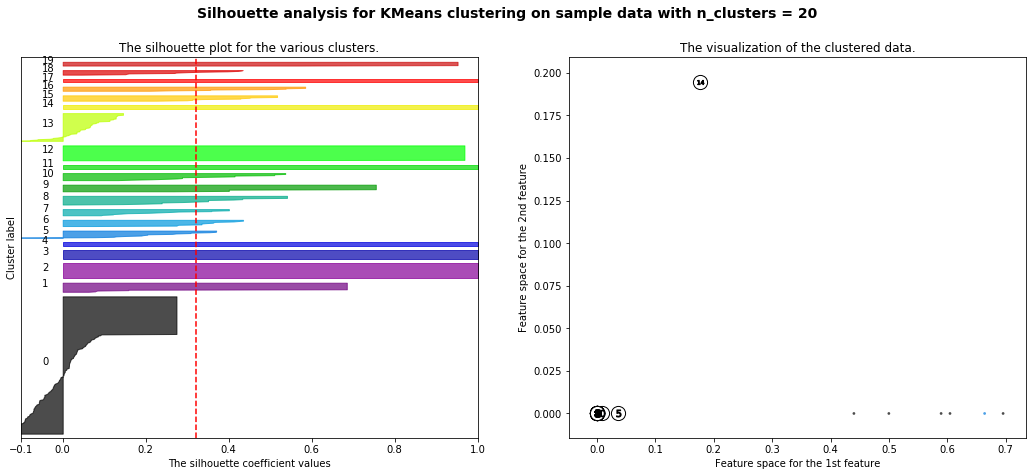

For n_clusters = 21 The average silhouette_score is : 0.316719252351


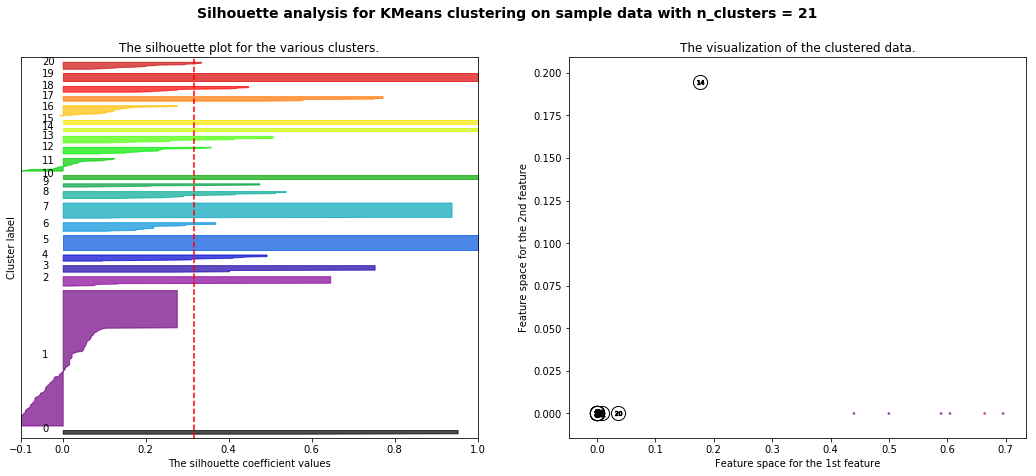

For n_clusters = 22 The average silhouette_score is : 0.340577723568


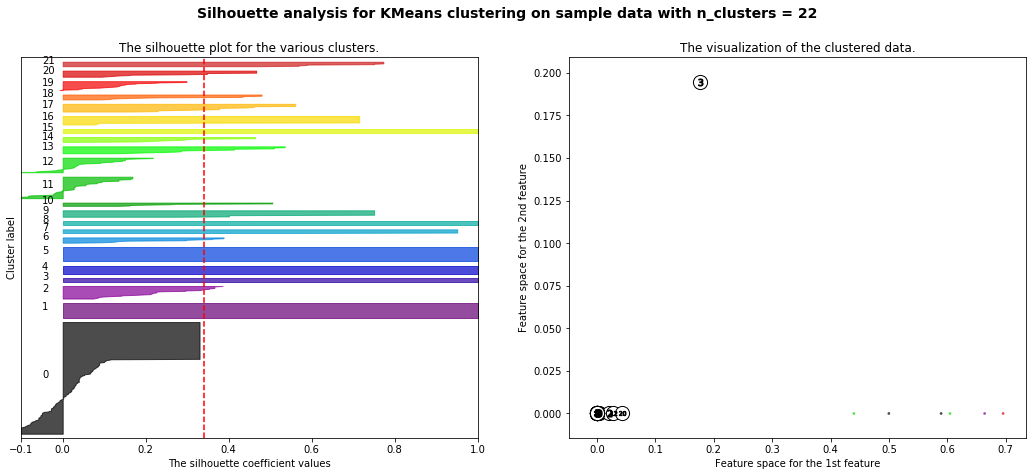

For n_clusters = 23 The average silhouette_score is : 0.347778597558


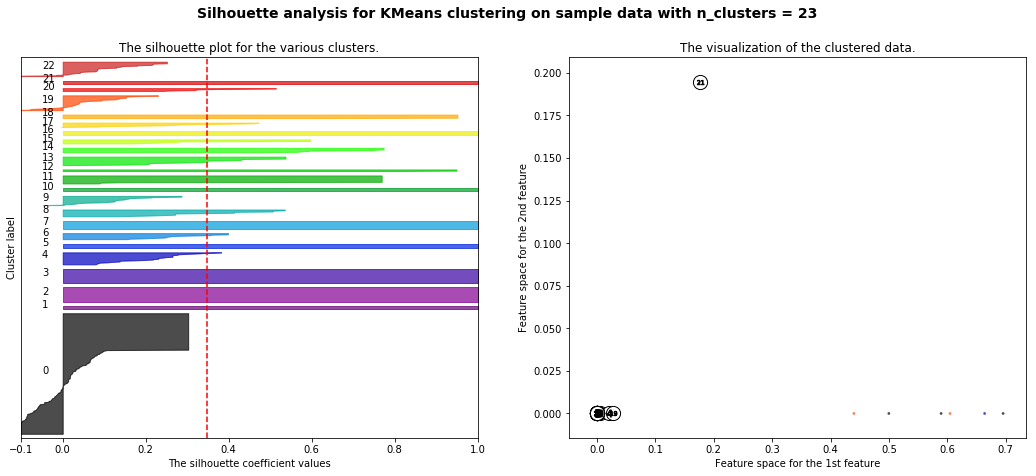

For n_clusters = 24 The average silhouette_score is : 0.335879272708


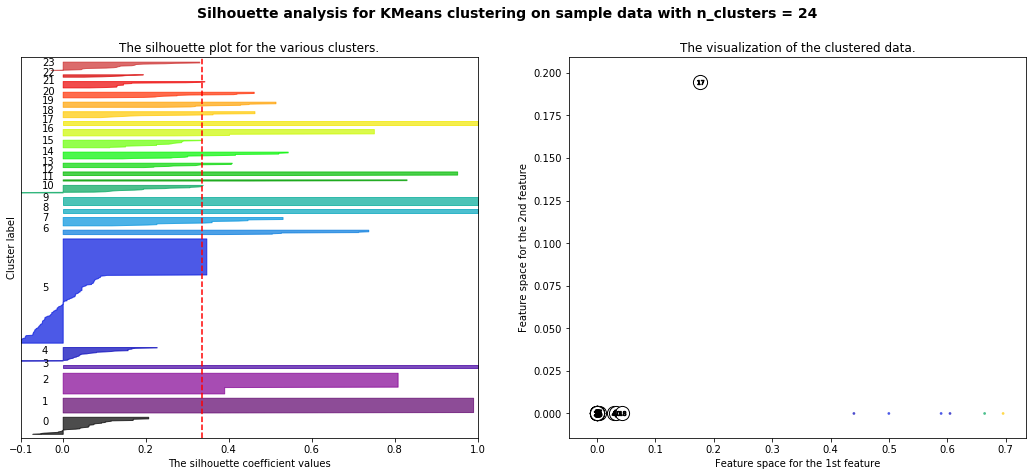

In [34]:
from sklearn.metrics import silhouette_score, silhouette_samples

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, tfidf_matrix.shape[0] + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(tfidf_matrix)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(tfidf_matrix, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(tfidf_matrix[:, 0].toarray(), tfidf_matrix[:, 1].toarray(), marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()


Going with 6 clusters given that in the plots above, 1) the elbow happens at cluster 6 and 2) the last silhouette plot that has all groups greater than the average is 6.

In [55]:
num_clusters = 6

km = KMeans(n_clusters=num_clusters, random_state=10)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 189 ms, sys: 11.3 ms, total: 201 ms
Wall time: 227 ms


In [56]:
ranks = list(range(1,101))
# len(titles)

In [57]:
print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace

Top terms per cluster:

Cluster 0 words: b'Perfect', b'Perfect', b'AllyBrooke', b'AllyBrooke', b'topicmusictv', b'available',

Cluster 1 words: b'Apple', b'RT', b'iTunes', b'iPhone', b'Music', b"'s",

Cluster 2 words: b'Apple', b"'s", b'Brooke', b'\xe2\x96\xaa\xef\xb8\x8fiTunes', b'est\xc3\xa1', b'FLEX',

Cluster 3 words: b'\xe2\x96\xaa\xef\xb8\x8fiTunes', b'Desiigner', b'Remix', b'Remix', b'Steve', b'Steve',

Cluster 4 words: b'iOS', b'Apple', b'releases', b'Apple', b'iPad', b"'s",

Cluster 5 words: b'RT', b'Apple', b"'s", b'Fifth', b'est\xc3\xa1', b'est\xc3\xa1',



## Scale and Plot the Clusters

Use Multi-dimensional scaling to be able to plot clusters

In [50]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [58]:
#set up colors per clusters using a dict
cluster_colors = {0: 'b', 1: 'g', 2: 'r', 3: 'c', 4: 'm', 5: 'k'}

#set up cluster names using a dict
cluster_names = {0: 'Ally Brook music available', 
                 1: 'Retweet, iTunes, Music', 
                 2: 'Brooke, FLEX, iTunes', 
                 3: 'Remix, Steve Desiigner', 
                 4: 'Apple Releases iPad',
                 5: 'Retweet, Fifth Harmony'}

In [63]:
len(clusters)

710

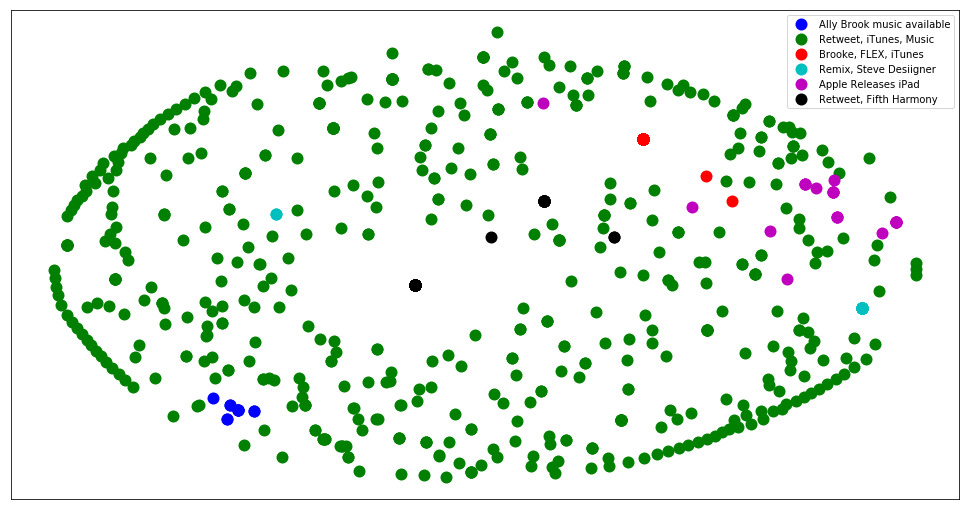

In [64]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
# for i in range(len(df)):
#     ax.text(df.iloc[i]['x'], df.iloc[i]['y'], df.iloc[i]['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)